In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import re
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None

### Import & Housekeeping

In [2]:
years = [1988,1997]

movie_df = pd.read_csv('../04_Data/{}_{}_merged_featurized.csv'.format(years[0],years[1]), index_col=0)

In [3]:
movie_df.head(3)

,index,3d,genre,imax,intl_box,mpaa,open,prod_budget,rundays,runtime,series,theaters,title,usa_box,usa_open,action,comedy,drama,horror,romance,animation,scifi/fantasy,genre_counts,other,year,G,NC-17,PG,PG-13,R,Unrated
0,0,0.00,Drama,0.00,354825435.00,R,1988-12-16,25000000.00,NaN,133.00,0.00,1590.00,Rain Man,172825435.00,7005719.00,0,0,1,0,0,0,0,1,0,1988.00,0,0,0,0,1,0
1,1,0.00,Fantasy Comedy,0.00,329803958.00,PG,1988-06-24,70000000.00,NaN,103.00,0.00,1598.00,Who Framed Roger Rabbit,156452370.00,11226239.00,0,1,0,0,0,0,1,2,0,1988.00,0,0,1,0,0,0
2,3,0.00,Fantasy Comedy,0.00,151668774.00,PG,1988-06-03,18000000.00,NaN,104.00,0.00,1419.00,Big,114968774.00,8216190.00,0,1,0,0,0,0,1,2,0,1988.00,0,0,1,0,0,0


In [4]:
#Set groups of column names to make subsequent plots modular
target = ["usa_box"]
info = ["prod_budget", 'series', 'imax', '3d', "runtime", "year","genre_counts"]
theater = ["title", "theaters"]
mpaa = ["G", "PG", "PG-13", "R"]
genre = ["action", "comedy", "drama", "horror", "scifi/fantasy", "romance", "animation", "other"]

columns = info + mpaa + genre + theater + target  #this is all the columns

In [5]:
#isolate the columns with features and target
movie_df = movie_df[columns]

### Exploratory

In [6]:
movie_df.describe()

,prod_budget,series,imax,3d,runtime,year,genre_counts,G,PG,PG-13,R,action,comedy,drama,horror,scifi/fantasy,romance,animation,other,theaters,usa_box
count,508.00,2000.00,2000.00,2000.00,1996.00,1985.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,1869.00,2000.00
mean,31544912.62,0.07,0.00,0.00,106.15,1992.52,1.03,0.04,0.19,0.24,0.50,0.25,0.33,0.21,0.06,0.06,0.09,0.03,0.19,1171.59,24438234.52
std,26667958.04,0.25,0.00,0.02,19.06,2.87,0.64,0.19,0.39,0.43,0.50,0.43,0.47,0.41,0.24,0.24,0.29,0.17,0.39,771.01,38787080.31
min,7000.00,0.00,0.00,0.00,38.00,1988.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,272931.00
25%,11000000.00,0.00,0.00,0.00,95.00,1990.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,452.00,2982289.75
50%,25000000.00,0.00,0.00,0.00,102.00,1993.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1225.00,10942037.50
75%,45000000.00,0.00,0.00,0.00,114.00,1995.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1762.00,28769092.25
max,200000000.00,1.00,0.00,1.00,254.00,1997.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3565.00,600788188.00


In [7]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 22 columns):
prod_budget      508 non-null float64
series           2000 non-null float64
imax             2000 non-null float64
3d               2000 non-null float64
runtime          1996 non-null float64
year             1985 non-null float64
genre_counts     2000 non-null int64
G                2000 non-null int64
PG               2000 non-null int64
PG-13            2000 non-null int64
R                2000 non-null int64
action           2000 non-null int64
comedy           2000 non-null int64
drama            2000 non-null int64
horror           2000 non-null int64
scifi/fantasy    2000 non-null int64
romance          2000 non-null int64
animation        2000 non-null int64
other            2000 non-null int64
title            2000 non-null object
theaters         1869 non-null float64
usa_box          2000 non-null float64
dtypes: float64(8), int64(13), object(1)
memory usage: 359.4+ K

In [8]:
movie_df.head(3)

,prod_budget,series,imax,3d,runtime,year,genre_counts,G,PG,PG-13,R,action,comedy,drama,horror,scifi/fantasy,romance,animation,other,title,theaters,usa_box
0,25000000.00,0.00,0.00,0.00,133.00,1988.00,1,0,0,0,1,0,0,1,0,0,0,0,0,Rain Man,1590.00,172825435.00
1,70000000.00,0.00,0.00,0.00,103.00,1988.00,2,0,1,0,0,0,1,0,0,1,0,0,0,Who Framed Roger Rabbit,1598.00,156452370.00
2,18000000.00,0.00,0.00,0.00,104.00,1988.00,2,0,1,0,0,0,1,0,0,1,0,0,0,Big,1419.00,114968774.00


In [9]:
#this removes from the set any movie less than 600 Theater Locations (aka Limited Release)
movie_df = movie_df[movie_df["theaters"]>=600] 

In [10]:
movie_df.shape   #1520 Movies from 2008-2017 with more than 600 Theater Locations

(1337, 22)

In [11]:
movie_df.drop(["theaters"],axis=1,inplace=True)

In [12]:
#this removes from the set any movie with no production budget
movie_df = movie_df.dropna(how='any').reset_index()

In [13]:
movie_df.shape   #1369 Movies that contain a budget on The-Numbers.com

(433, 22)

In [14]:
movie_df.info()   #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 22 columns):
index            433 non-null int64
prod_budget      433 non-null float64
series           433 non-null float64
imax             433 non-null float64
3d               433 non-null float64
runtime          433 non-null float64
year             433 non-null float64
genre_counts     433 non-null int64
G                433 non-null int64
PG               433 non-null int64
PG-13            433 non-null int64
R                433 non-null int64
action           433 non-null int64
comedy           433 non-null int64
drama            433 non-null int64
horror           433 non-null int64
scifi/fantasy    433 non-null int64
romance          433 non-null int64
animation        433 non-null int64
other            433 non-null int64
title            433 non-null object
usa_box          433 non-null float64
dtypes: float64(7), int64(14), object(1)
memory usage: 74.5+ KB


### Distribution Plots

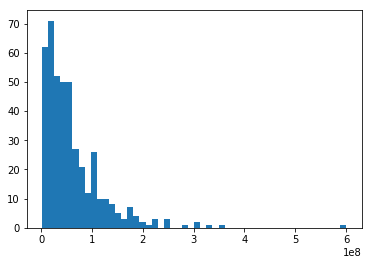

In [18]:
#Box Office
plt.hist(movie_df['usa_box'],bins=50)
plt.savefig("residuals.pdf");

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


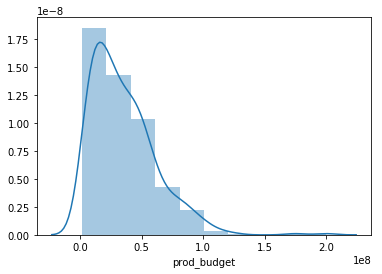

In [17]:
#Production Budget
sns.distplot(movie_df['prod_budget'],bins=10);

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


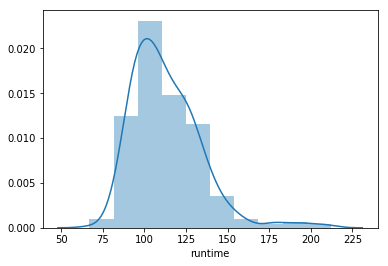

In [18]:
#Runtime
sns.distplot(movie_df["runtime"],bins=10);

### Pair Plots! 

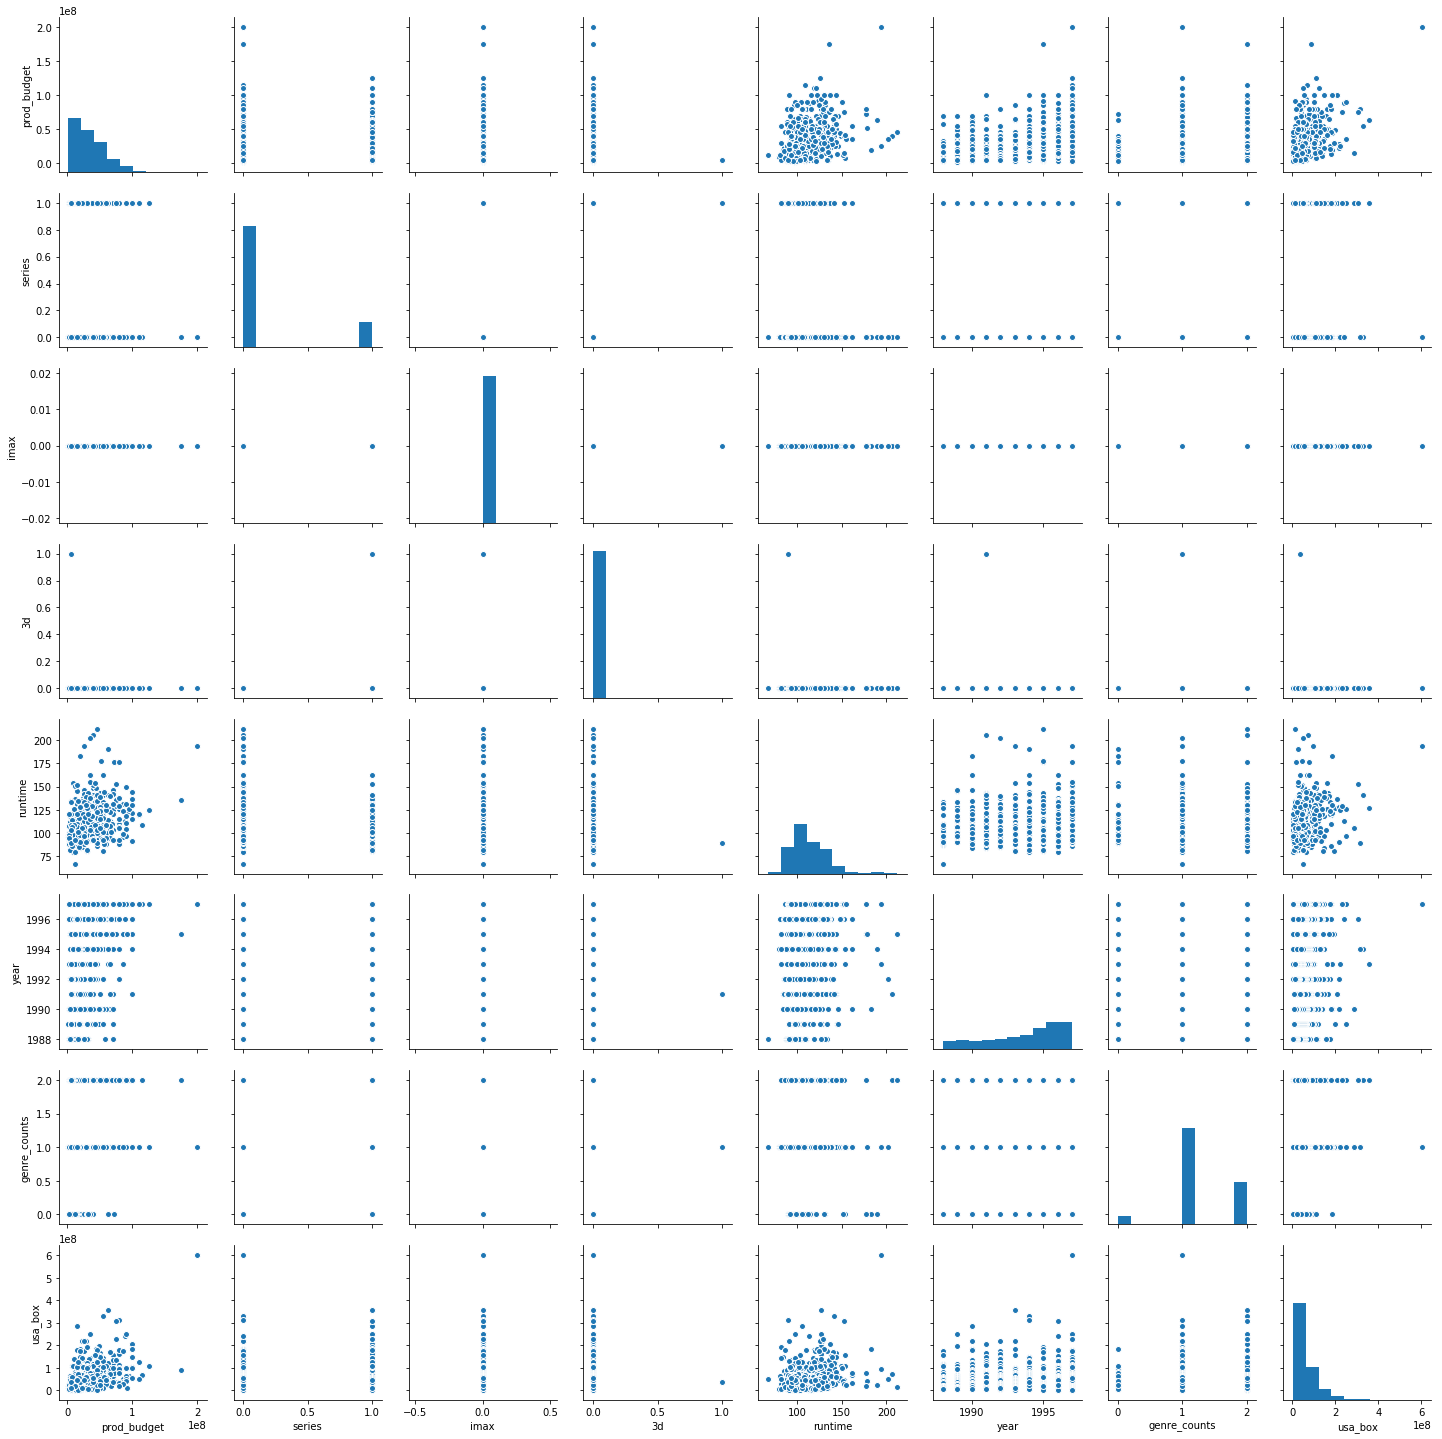

In [19]:
sns.pairplot(movie_df[info + target])

In [20]:
movie_df[info + target].corr()

,prod_budget,series,imax,3d,runtime,year,genre_counts,usa_box
prod_budget,1.00,-0.03,nan,-0.05,0.31,0.32,0.15,0.43
series,-0.03,1.00,nan,0.10,-0.10,-0.24,-0.01,0.21
imax,nan,nan,nan,nan,nan,nan,nan,nan
3d,-0.05,0.10,nan,1.00,-0.06,-0.05,-0.02,-0.02
runtime,0.31,-0.10,nan,-0.06,1.00,0.06,-0.04,0.27
year,0.32,-0.24,nan,-0.05,0.06,1.00,0.03,-0.05
genre_counts,0.15,-0.01,nan,-0.02,-0.04,0.03,1.00,0.07
usa_box,0.43,0.21,nan,-0.02,0.27,-0.05,0.07,1.00


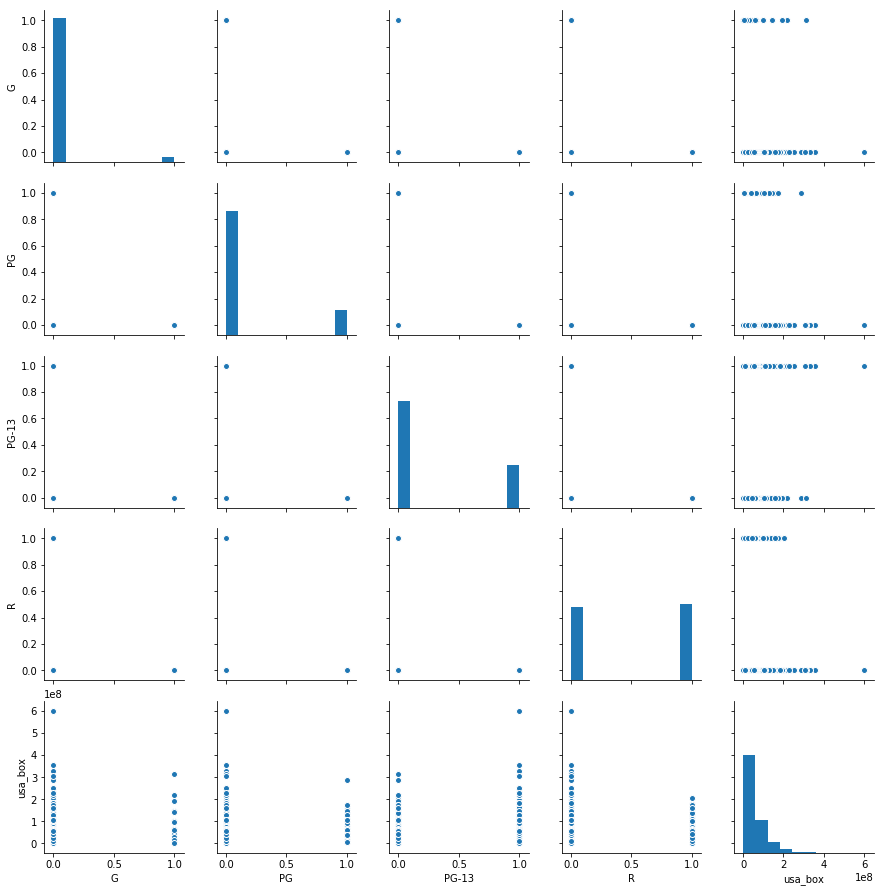

In [21]:
sns.pairplot(movie_df[mpaa + target])

In [22]:
movie_df[mpaa + target].corr()

,G,PG,PG-13,R,usa_box
G,1.00,-0.08,-0.12,-0.19,0.12
PG,-0.08,1.00,-0.29,-0.46,0.05
PG-13,-0.12,-0.29,1.00,-0.65,0.17
R,-0.19,-0.46,-0.65,1.00,-0.23
usa_box,0.12,0.05,0.17,-0.23,1.00


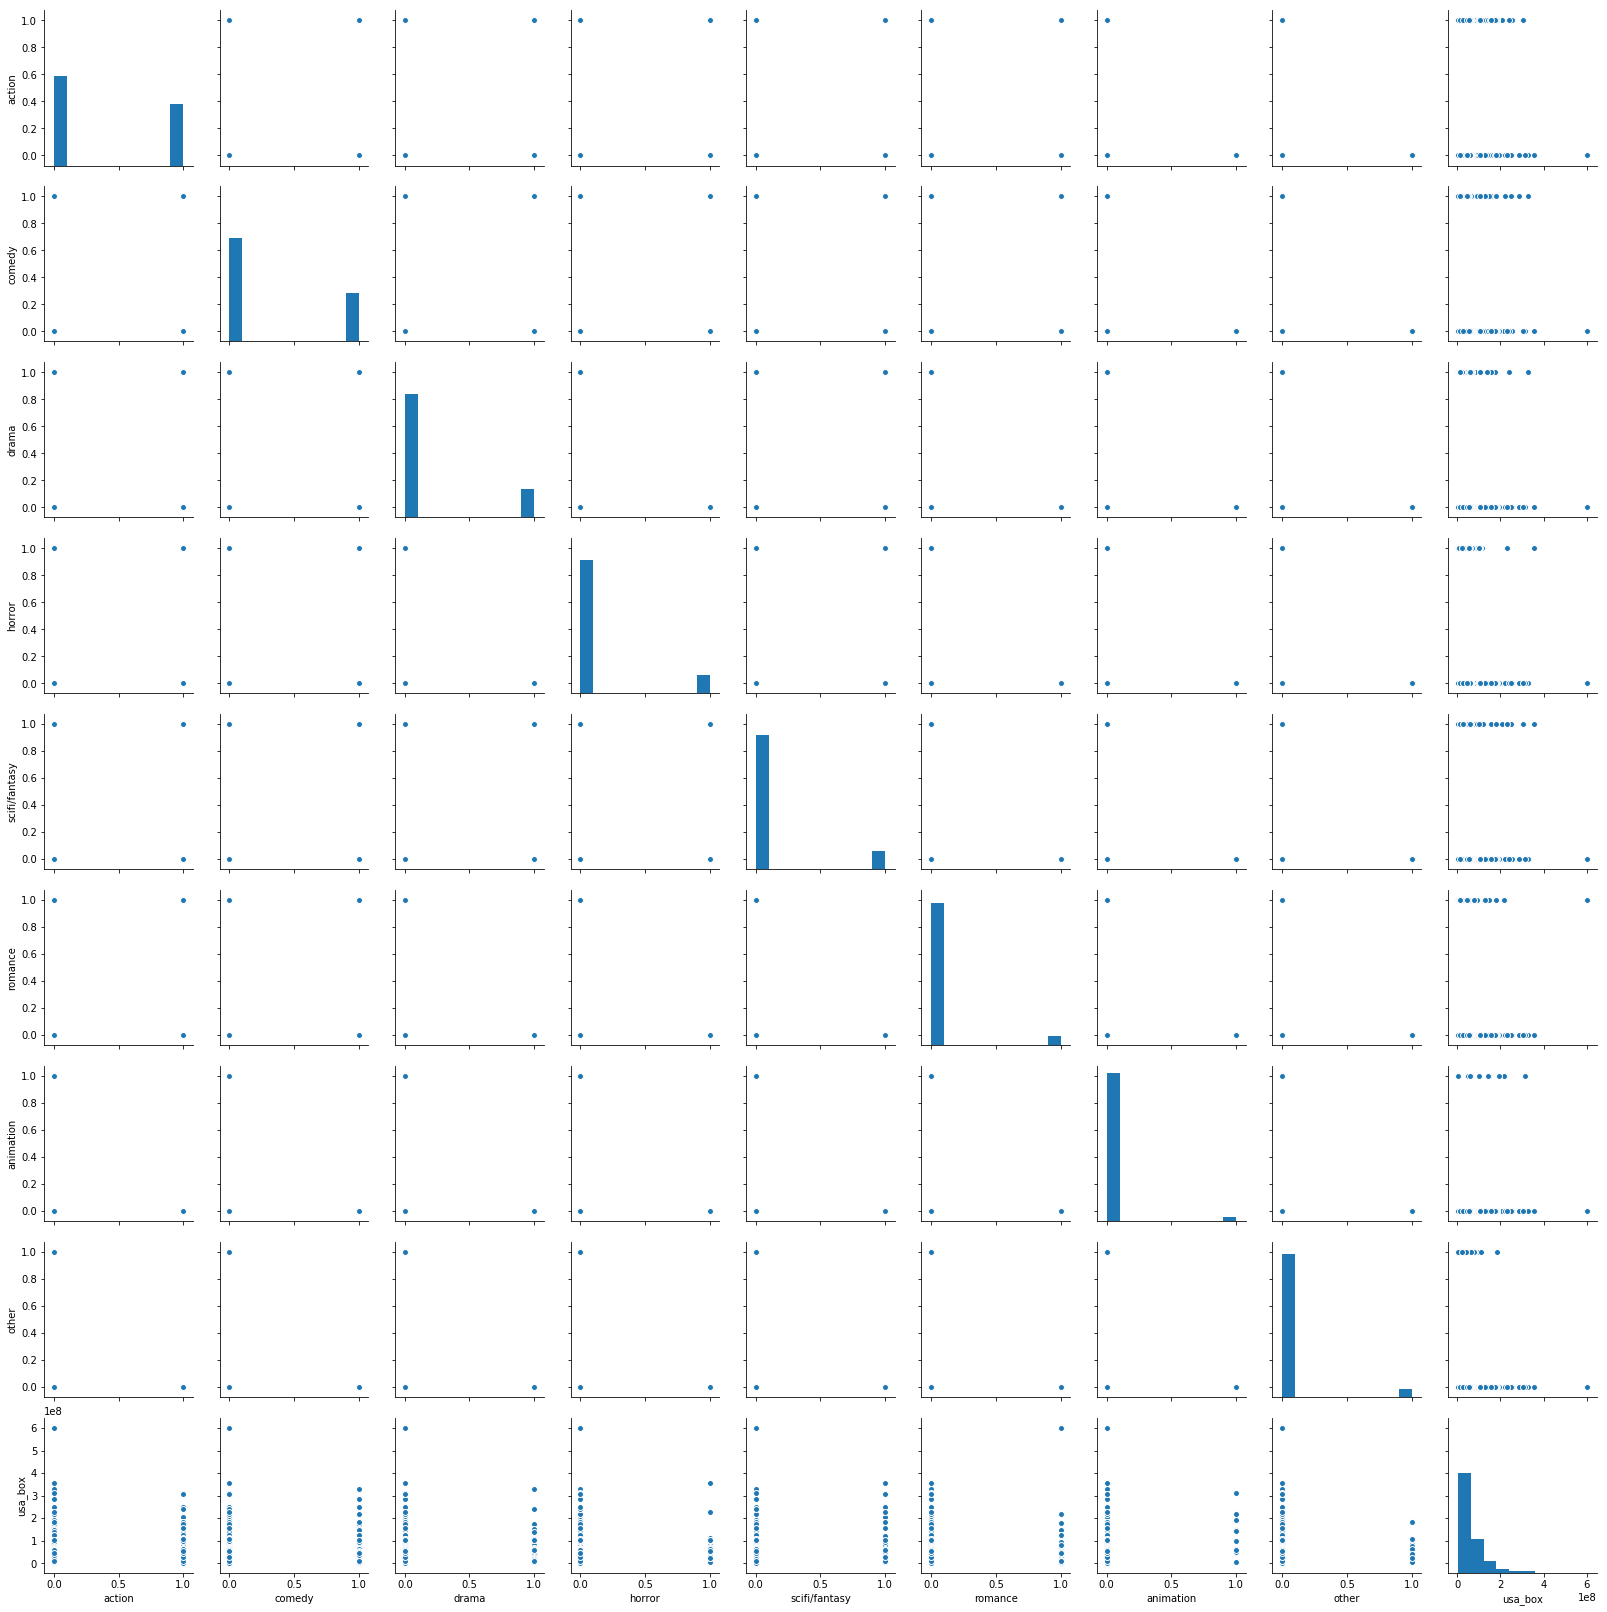

In [23]:
sns.pairplot(movie_df[genre + target])

In [24]:
movie_df[genre + target].corr()

,action,comedy,drama,horror,scifi/fantasy,romance,animation,other,usa_box
action,1.00,-0.36,-0.18,-0.21,0.02,-0.19,-0.13,-0.20,0.01
comedy,-0.36,1.00,-0.21,-0.09,-0.05,0.11,-0.11,-0.16,-0.02
drama,-0.18,-0.21,1.00,-0.17,-0.12,-0.12,-0.08,-0.12,-0.04
horror,-0.21,-0.09,-0.17,1.00,0.04,-0.09,-0.06,-0.09,-0.07
scifi/fantasy,0.02,-0.05,-0.12,0.04,1.00,-0.09,-0.06,-0.09,0.09
romance,-0.19,0.11,-0.12,-0.09,-0.09,1.00,-0.04,-0.06,0.10
animation,-0.13,-0.11,-0.08,-0.06,-0.06,-0.04,1.00,-0.04,0.17
other,-0.20,-0.16,-0.12,-0.09,-0.09,-0.06,-0.04,1.00,-0.08
usa_box,0.01,-0.02,-0.04,-0.07,0.09,0.10,0.17,-0.08,1.00


## Box Plots

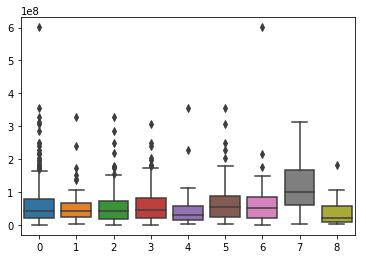

In [25]:
all_genre = movie_df["usa_box"].to_frame()
drama = movie_df["usa_box"][movie_df["drama"] == 1].to_frame()
comedy = movie_df["usa_box"][movie_df["comedy"] == 1].to_frame()
action = movie_df["usa_box"][movie_df["action"] == 1].to_frame()
horror = movie_df["usa_box"][movie_df["horror"] == 1].to_frame()
scifi = movie_df["usa_box"][movie_df["scifi/fantasy"] == 1].to_frame()
romance = movie_df["usa_box"][movie_df["romance"] == 1].to_frame()
animation = movie_df["usa_box"][movie_df["animation"] == 1].to_frame()
other = movie_df["usa_box"][movie_df["other"] == 1].to_frame()
sns.boxplot(data=[all_genre, drama,comedy,action,horror,scifi,romance,animation,other]);

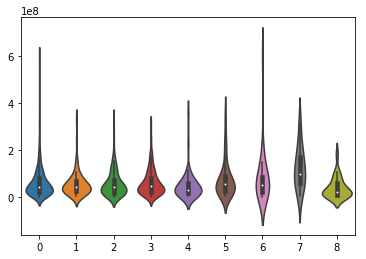

In [26]:
sns.violinplot(data=[all_genre, drama,comedy,action,horror,scifi,romance,animation,other]);

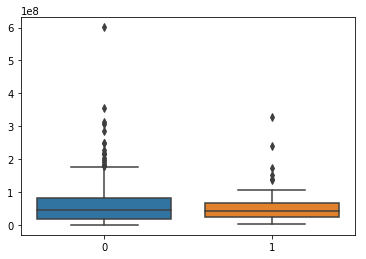

In [27]:
#DRAMA
drama = movie_df["usa_box"][movie_df["drama"] == 1].to_frame()
not_drama = movie_df["usa_box"][movie_df["drama"] == 0].to_frame()
sns.boxplot(data=[not_drama, drama]);

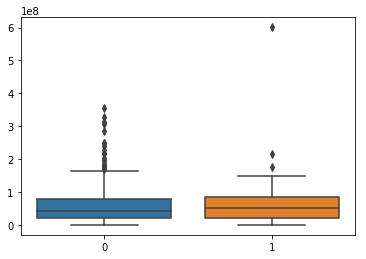

In [28]:
#ROMANCE
romance = movie_df["usa_box"][movie_df["romance"] == 1].to_frame()
not_romance = movie_df["usa_box"][movie_df["romance"] == 0].to_frame()
sns.boxplot(data=[not_romance, romance]);

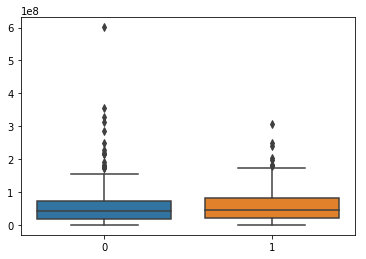

In [29]:
#ACTION
action = movie_df["usa_box"][movie_df["action"] == 1].to_frame()
not_action = movie_df["usa_box"][movie_df["action"] == 0].to_frame()
sns.boxplot(data=[not_action, action]);

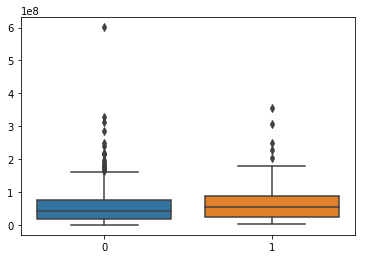

In [30]:
#SCIFI/FANTASY
scifi = movie_df["usa_box"][movie_df["scifi/fantasy"] == 1].to_frame()
not_scifi = movie_df["usa_box"][movie_df["scifi/fantasy"] == 0].to_frame()
sns.boxplot(data=[not_scifi, scifi]);

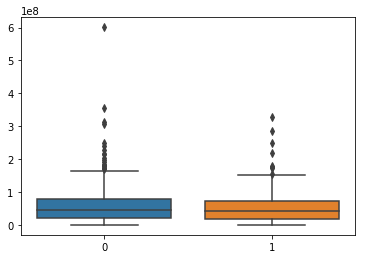

In [31]:
#COMEDY
comedy = movie_df["usa_box"][movie_df["comedy"] == 1].to_frame()
not_comedy = movie_df["usa_box"][movie_df["comedy"] == 0].to_frame()
sns.boxplot(data=[not_comedy, comedy]);

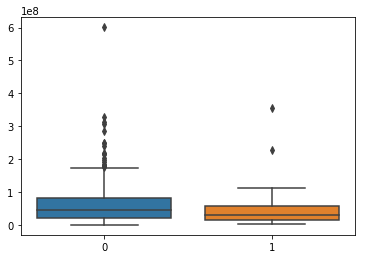

In [32]:
#HORROR
horror = movie_df["usa_box"][movie_df["horror"] == 1].to_frame()
not_horror = movie_df["usa_box"][movie_df["horror"] == 0].to_frame()
sns.boxplot(data=[not_horror, horror]);

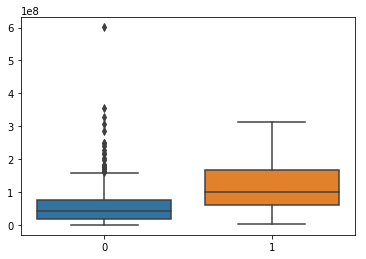

In [33]:
#ANIMATION
comedy = movie_df["usa_box"][movie_df["animation"] == 1].to_frame()
not_comedy = movie_df["usa_box"][movie_df["animation"] == 0].to_frame()
sns.boxplot(data=[not_comedy, comedy]);

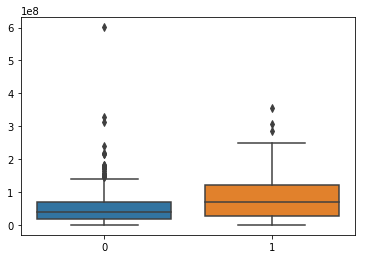

In [34]:
#SERIES
series = movie_df["usa_box"][movie_df["series"] == 1].to_frame()
not_series = movie_df["usa_box"][movie_df["series"] == 0].to_frame()
sns.boxplot(data=[not_series, series]);

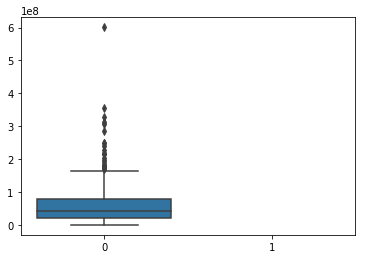

In [35]:
#IMAX
imax = movie_df["usa_box"][movie_df["imax"] == 1].to_frame()
not_imax = movie_df["usa_box"][movie_df["imax"] == 0].to_frame()
sns.boxplot(data=[not_imax, imax]);

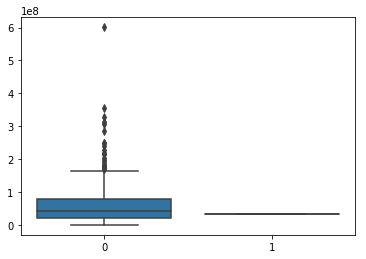

In [36]:
#3D
threed = movie_df["usa_box"][movie_df["3d"] == 1].to_frame()
not_threed = movie_df["usa_box"][movie_df["3d"] == 0].to_frame()
sns.boxplot(data=[not_threed, threed]);

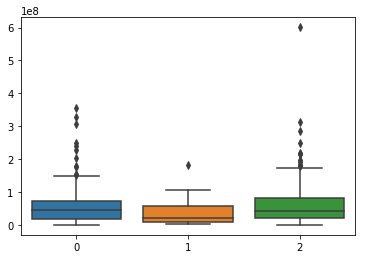

In [37]:
#Genre Numbers
much_variable = movie_df["usa_box"][movie_df["genre_counts"] == 2].to_frame()
variable = movie_df["usa_box"][movie_df["genre_counts"] == 1].to_frame()
not_variable = movie_df["usa_box"][movie_df["genre_counts"] == 0].to_frame()
sns.boxplot(data=[much_variable, not_variable, variable]);

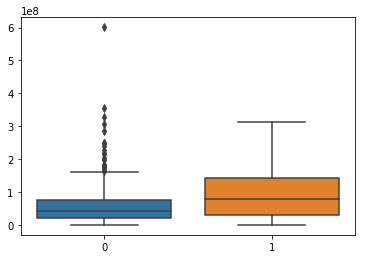

In [38]:
#G-Rating
variable = movie_df["usa_box"][movie_df["G"] == 1].to_frame()
not_variable = movie_df["usa_box"][movie_df["G"] == 0].to_frame()
sns.boxplot(data=[not_variable, variable]);

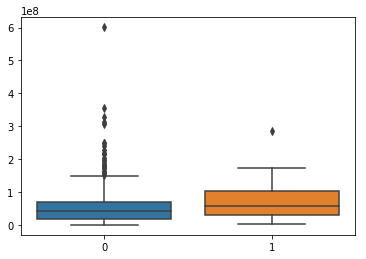

In [39]:
#PG-Rating
variable = movie_df["usa_box"][movie_df["PG"] == 1].to_frame()
not_variable = movie_df["usa_box"][movie_df["PG"] == 0].to_frame()
sns.boxplot(data=[not_variable, variable]);

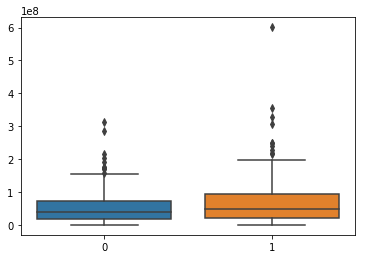

In [40]:
#PG13-Rating
variable = movie_df["usa_box"][movie_df["PG-13"] == 1].to_frame()
not_variable = movie_df["usa_box"][movie_df["PG-13"] == 0].to_frame()
sns.boxplot(data=[not_variable, variable]);

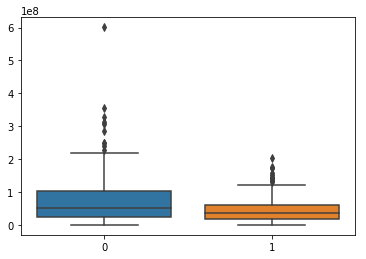

In [41]:
#R-Rating
variable = movie_df["usa_box"][movie_df["R"] == 1].to_frame()
not_variable = movie_df["usa_box"][movie_df["R"] == 0].to_frame()
sns.boxplot(data=[not_variable, variable]);

### Baseline Model & OLS Regression Summary Stats

In [42]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [43]:
#baseline model & OLS regression summary stats
X=movie_df[info + mpaa + genre]

y=movie_df[target]


model = sm.OLS(y,sm.add_constant(X))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                usa_box   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     14.77
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           3.24e-33
Time:                        14:44:25   Log-Likelihood:                -8279.5
No. Observations:                 433   AIC:                         1.660e+04
Df Residuals:                     415   BIC:                         1.667e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.946e+09   1.91e+09      3.632      0.000    3.19e+09    1.07e+10
prod_budget       0.9561      0.115      8.325      0.000       0.730       1.182
series         3.787e+07   6.89e+06      5.496      0.000    2.43e+07    5.14e+07
imax              0.0078      0.002      3.632      0.000       0.004       0.012
3d            -1.043e+07   5.06e+07     -0.206      0.837    -1.1e+08     8.9e+07
runtime        7.444e+05   1.46e+05      5.082      0.000    4.56e+05    1.03e+06
year          -3.524e+06   9.58e+05     -3.678      0.000   -5.41e+06   -1.64e+06
genre_counts   7.837e+06   6.18e+06      1.269      0.205    -4.3e+06       2e+07
G              2.276e+07   5.52e+07      0.413      0.680   -8.57e+07    1.31e+08
PG             3.334e+07   5.07e+07      0.657      0.512   -6.64e+07    1.33e+08
PG-13          3.007e+07   5.06e+07      0.594      0.553   -6.94e+07     1.3e+08
R              1.444e+07   5.06e+07      0.286      0.775   -8.49e+07    1.14e+08
action        -2.369e+07   5.64e+06     -4.204      0.000   -3.48e+07   -1.26e+07
comedy        -1.594e+06   6.03e+06     -0.264      0.792   -1.35e+07    1.03e+07
drama         -1.344e+07   6.99e+06     -1.922      0.055   -2.72e+07    3.04e+05
horror        -1.548e+07    7.9e+06     -1.959      0.051    -3.1e+07    5.15e+04
scifi/fantasy -1.161e+07   8.03e+06     -1.445      0.149   -2.74e+07    4.18e+06
romance        8.776e+06   9.69e+06      0.905      0.366   -1.03e+07    2.78e+07
animation      6.487e+07   2.26e+07      2.864      0.004    2.04e+07    1.09e+08
other           -2.4e+07   1.35e+07     -1.783      0.075   -5.05e+07    2.47e+06
==============================================================================
Omnibus:                      162.511   Durbin-Watson:                   1.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              801.900
Skew:                           1.563   Prob(JB):                    7.41e-175
Kurtosis:                       8.889   Cond. No.                     5.76e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.58e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0,0.5,'Residual')

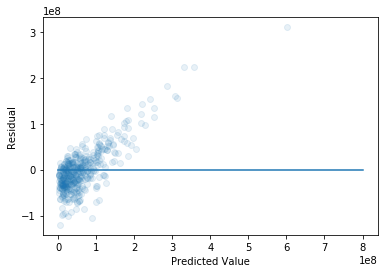

In [44]:
y_pred = results.predict(sm.add_constant(X))

plt.scatter(y["usa_box"], y["usa_box"] - y_pred, alpha=.1)
plt.plot(np.linspace(0,800000000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')